In [22]:
!python main.py -d person -p 'smokes(person);friends(person,person)' \
    -f 'friends(x,y);smokes(x);friends(x,y) ^ smokes(x) => smokes(y)' -s 10

[I 201114 00:32:04 partition_func_solver:38] elapsed time for WFOMC call: 0.4284280063584447
[I 201114 00:32:05 partition_func_solver:38] elapsed time for WFOMC call: 0.45340803172439337
[I 201114 00:32:05 partition_func_solver:38] elapsed time for WFOMC call: 0.44780585588887334
[I 201114 00:32:06 partition_func_solver:38] elapsed time for WFOMC call: 0.45469924295321107
[I 201114 00:32:06 partition_func_solver:38] elapsed time for WFOMC call: 0.4466681368649006
[I 201114 00:32:07 partition_func_solver:38] elapsed time for WFOMC call: 0.4756805058568716
[I 201114 00:32:08 partition_func_solver:38] elapsed time for WFOMC call: 0.4412562851794064
[I 201114 00:32:08 polytope:260] elapsed time for quick-hull: 0.0245932643301785
[I 201114 00:32:08 __init__:129] function add_facet execution time: 0.099
[I 201114 00:32:09 partition_func_solver:38] elapsed time for WFOMC call: 0.42986726481467485
[I 201114 00:32:09 polytope:260] elapsed time for quick-hull: 0.024553459137678146
[I 201114 00:3

[I 201114 00:32:23 polytope:260] elapsed time for quick-hull: 0.024160490836948156
[I 201114 00:32:23 __init__:129] function add_facet execution time: 0.090
[I 201114 00:32:23 main:182] Coordinate: [  0   1 100]
    Facets: 
    [[       -1         0         0]
     [792344645 792344645 792344645]
     [        0         0         1]] * x <= [        0 846962560       100]
    
    Coordinate: [  1   0 100]
    Facets: 
    [[792344645 792344645 792344645]
     [792344645 792344645 792344645]
     [792344645 792344645 792344645]
     [        0         0         1]
     [        0         0         1]
     [        0         0         1]
     [        0        -1         0]
     [        0        -1         0]] * x <= [846962560 846962560 846962560       100       100       100         0
             0]
    
    Coordinate: [26  0 75]
    Facets: 
    [[        0         0        -1]
     [        0         0        -1]
     [792344645 792344645 792344645]
     [        0        -1    

In [47]:
import re
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt


def parse_WFOMC_num(log_str):
    res = re.findall(r'num of call WFOMC: (\d+)', log_str)
    return int(res[0])

def parse_wfomc_time(log_str):
    res = re.findall(r'elapsed time for WFOMC call: ([\d\.]*)', log_str)
    return list(map(lambda x: float(x), res))

def parse_quick_hull_time(log_str):
    res = re.findall(r'elapsed time for quick-hull: ([\d\.]*)', log_str)
    return list(map(lambda x: float(x), res))

def parse_add_facet_time(log_str):
    res = re.findall(r'function add_facet execution time: ([\d\.]*)', log_str)
    return list(map(lambda x: float(x), res))

def parse_time(log_file):
    with open(log_file, 'r') as f:
        log = f.read()
    wfomc_time, quick_hull_time, add_facet_time = \
        parse_wfomc_time(log), parse_quick_hull_time(log), parse_add_facet_time(log)
    WFOMC_num = parse_WFOMC_num(log)
    return wfomc_time, quick_hull_time, add_facet_time, WFOMC_num
    

def plot(log_dir, prefix='2d', max_domain_size = 50):
    WFOMC_nums = []
    total_wfomc_time = []
    average_wfomc_time = []
    total_quick_hull_time = []
    average_quick_hull_time = []
    total_add_facet_time = []
    average_add_facet_time = []
    for i in range(1, max_domain_size + 1):
        wfomc_time, quick_hull_time, add_facet_time, WFOMC_num = parse_time('{}/log{}.txt'.format(log_dir, i))
        total_wfomc_time.append(np.sum(wfomc_time))
        average_wfomc_time.append(np.mean(wfomc_time))
        total_quick_hull_time.append(np.sum(quick_hull_time))
        average_quick_hull_time.append(np.mean(quick_hull_time))
        total_add_facet_time.append(np.sum(add_facet_time))
        average_add_facet_time.append(np.mean(add_facet_time))
        WFOMC_nums.append(WFOMC_num)


    plt.title('Total WFOMC calls ({})'.format(prefix))
    WFOMC_nums = np.array(WFOMC_nums)
#     WFOMC_nums = np.log(WFOMC_nums)
    plt.plot(WFOMC_nums)
    plt.xlabel('domain size')
    plt.ylabel('call number')
    plt.show()


    plt.title('Total runtime for each part ({})'.format(prefix))
    colors = sns.color_palette('hls', 3)
    plt.plot(total_wfomc_time, label='wfomc', color=colors[0])
    plt.plot(total_quick_hull_time, label='quick hull', color=colors[1])
    # plt.plot(total_add_facet_time, label='convex hull processing', color=colors[2])
    plt.legend()
    plt.xlabel('domain size')
    plt.ylabel('second')
    plt.show()


    plt.title('Average runtime for each part ({})'.format(prefix))
    colors = sns.color_palette('hls', 3)
    plt.plot(average_wfomc_time, label='wfomc', color=colors[0])
    plt.plot(average_quick_hull_time, label='quick hull', color=colors[1])
    # plt.plot(average_add_facet_time, label='convex hull processing', color=colors[2])
    plt.legend()
    plt.xlabel('domain size')
    plt.ylabel('second')
    plt.show()

/home/lucien/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/lucien/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


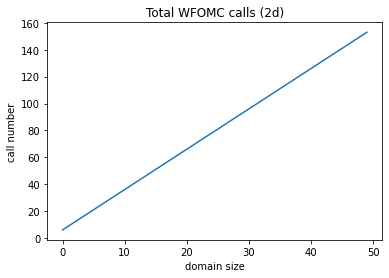

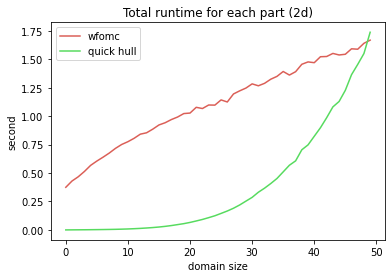

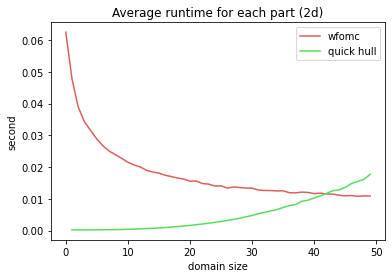

In [48]:
plot('./logs/friendsmoker2d/', '2d')

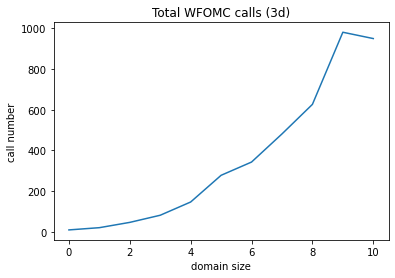

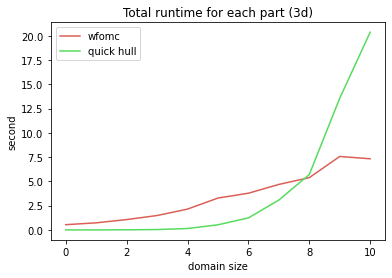

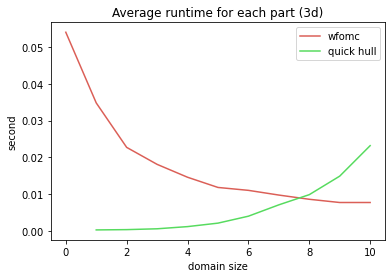

In [52]:
plot('./logs/friendsmoker3d/', '3d', 11)

# ![](./polytope.png)